# Введение

В данном ноутбуке представлен подробный анализ данных о пригодности воды для питья на основе ее химического состава.

Ссылка на датасет: https://www.kaggle.com/datasets/mssmartypants/water-quality

Я использовал различные методы машинного обучения для решения задачи классификации, такие как: **Логистическая регрессия**, **Метод k-ближайших соседей**, **Наивный байесовский классификатор**, **Градиентный бустинг**, **Деревья решений**, **Случайный лес**, **Стекинг**.


Датасет включает в себя следующие атрибуты:

- aluminium - опасен, если больше 2.8
- ammonia - опасен, если больше 32.5
- arsenic - опасен, если больше 0.01
- barium - опасен, если больше 2
- cadmium - опасен, если больше 0.005
- chloramine - опасен, если больше 4
- chromium - опасен, если больше 0.1
- copper - опасен, если больше 1.3
- flouride - опасен, если больше 1.5
- bacteria - опасен, если больше 0
- viruses - опасен, если больше 0
- lead - опасен, если больше 0.015
- nitrates - опасен, если больше 10
- nitrites - опасен, если больше 1
- mercury - опасен, если больше 0.002
- perchlorate - опасен, если больше 56
- radium - опасен, если больше 5
- selenium - опасен, если больше 0.5
- silver - опасен, если больше 0.1
- uranium - опасен, если больше 0.3
- is_safe - атрибут класса {0 - не безопасно, 1 - безопасно}

Импортируем основные библиотеки:

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Подготовка данных

На этом этапе нам необходимо:

- Импортировать датасет
- Избавить его от дубликатов и пропущенных значений
- Получить общую информацию о данных

In [39]:
df = pd.read_csv('waterQuality1.csv')

In [40]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


Проверим, есть ли в датасете дубликаты

In [41]:
df.duplicated().values.any()

False

Выведем общую информацию о данных

In [42]:
df.shape

(7999, 21)

In [43]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

Некоторые столбцы в нашем датасете не являются числовыми, приведем их к числовым с помощью соответсвующего метода из библиотеки **pandas**

In [45]:
df['ammonia'] = pd.to_numeric(df['ammonia'], errors='coerce')

In [46]:
df['is_safe'] = pd.to_numeric(df['is_safe'], errors='coerce')

In [47]:
df.dropna(inplace=True)

In [48]:
df['is_safe'] = df['is_safe'].astype('int64')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

Выведем сводную статистику для каждого признака в датасете

In [50]:
df.describe()

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


# Визуализация

Основная цель визуализации данных — это получение более глубокого понимания структуры и свойств данных, выявление скрытых закономерностей, а также обнаружение аномалий и выбросов. Для визуализации будем использовать библиотеки **matplotlib** и **seaborn**

In [51]:
columns = df.columns.to_list()
columns.remove('is_safe')

Давайте посмотрим на распределение значений каждого признака, в зависимости от пригодности воды для питья - таргетной переменной. Для этого будем использовать **boxplot**. Он показывает интерквартильный размах значений, а также минимальные и максимальные значения, не считая выбросов. Эти значения отмечены соответсвующими *усами*. Выбросы определяются как значения, лежащие за пределами интервала **Q1−1.5×IQR** до **Q3+1.5×IQR**, где **Q1** — первый квартиль, **Q3** — третий квартиль, а **IQR** — интерквартильный размах (разница между третьим и первым квартилями).

Синим цветом обозначены данные для питьевой воды, красным - для непитьевой.

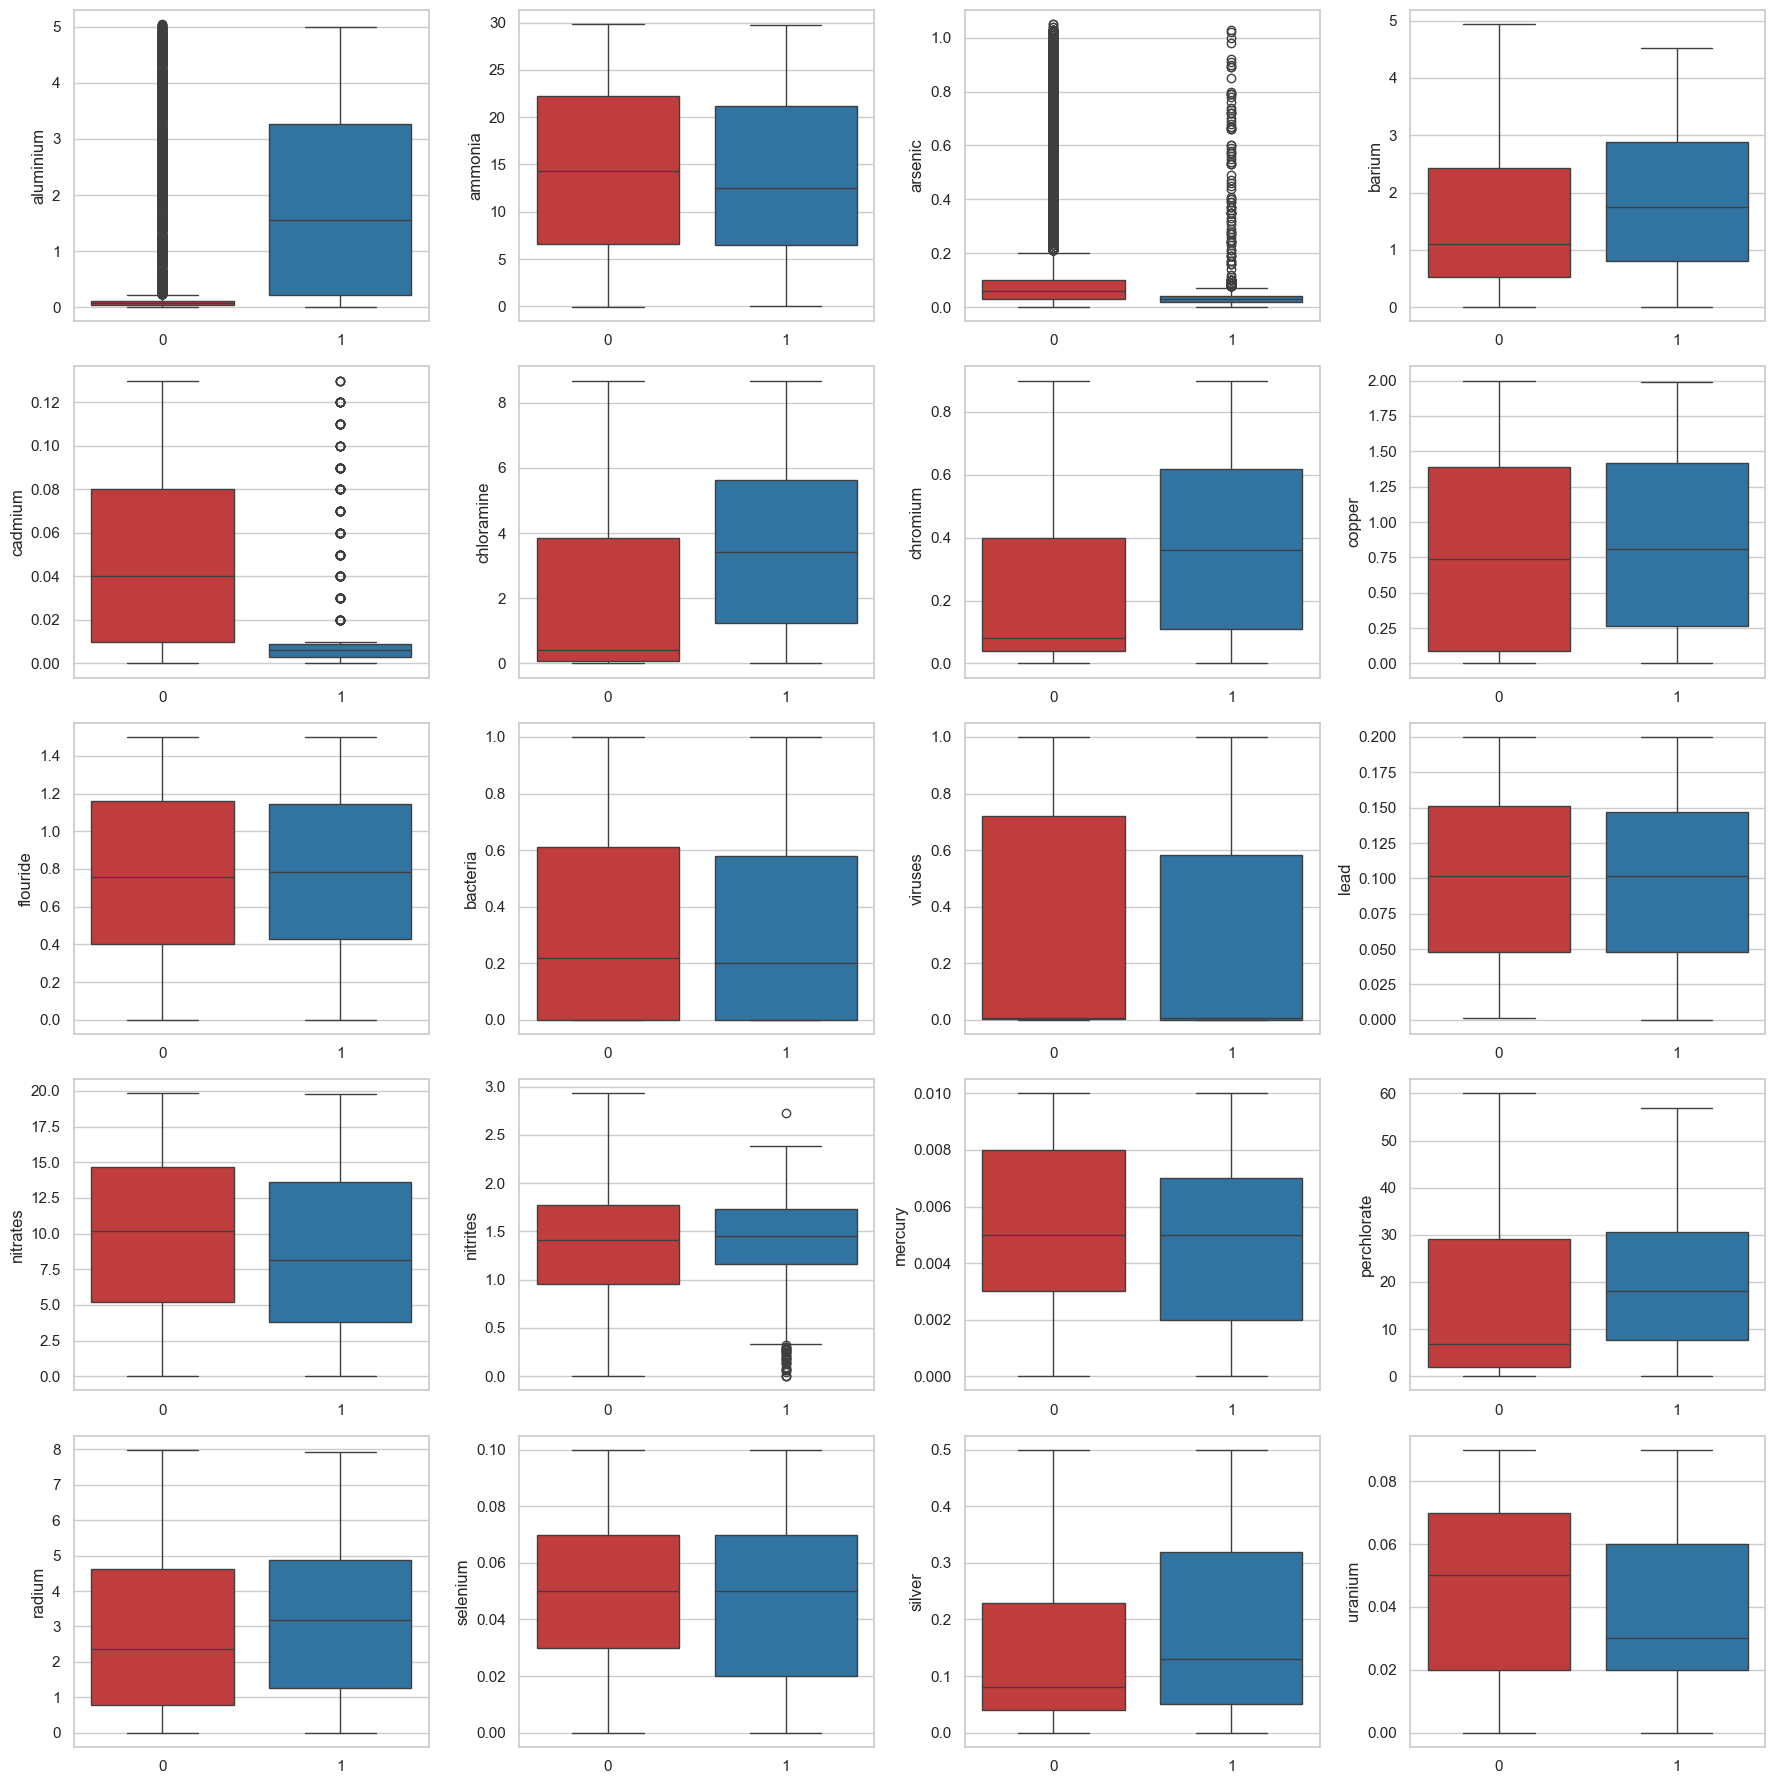

In [52]:
sns.set(style='whitegrid')
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize=(18, 18))
for idx, feat in enumerate(columns):
    ax = axes[int(idx/4), idx%4]
    sns.boxplot(x = 'is_safe', y = feat, data = df, ax = ax, hue = 'is_safe', legend = False, palette = ['tab:red', 'tab:blue'])
    ax.set_xlabel('')
    ax.set_ylabel(feat)

plt.tight_layout()

Мы видем что такие признаки, как **alluminium, cadmium, chloramine, chromium** могут быть наиболее полезными для предсказания целевой переменной, так как имеют наибольшее различие в диаграммах в зависимости от значения таргетного признака

Рассмотрим распределения каждого признака с помощью гистограммы, будем использовать **histplot** из библиотеки **seaborn**

Также для каждой гистограммы построим ядерную оценку плотности, чтобы отобразить более сглаженную оценку плотности вероятности распределения данных

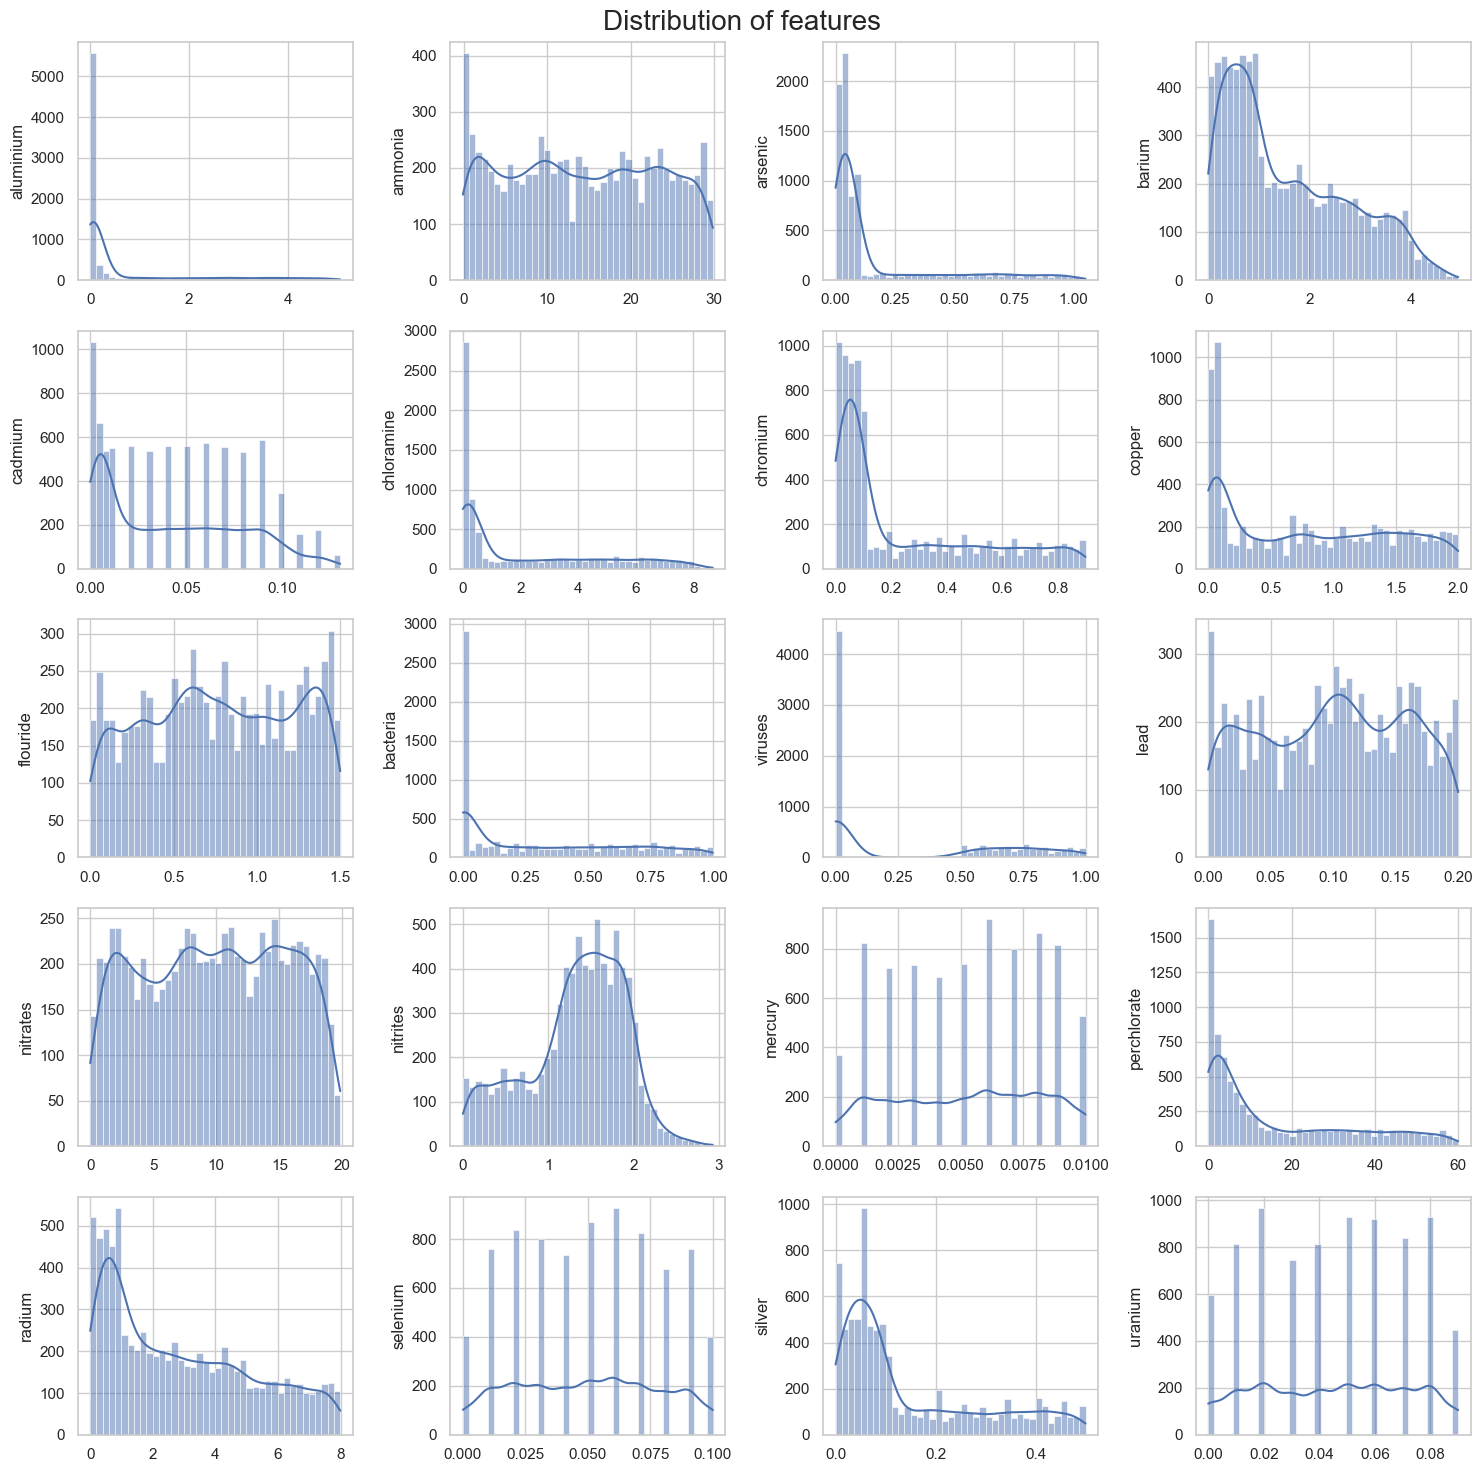

In [53]:
fig, axes = plt.subplots(nrows = 5, ncols = 4, figsize = (15, 15))
for idx, feat in enumerate(columns):
    ax = axes[int(idx//4), idx%4]
    sns.histplot(data = df[feat], kde = True, ax = ax, bins = 40)
    ax.set_ylabel(feat)
    ax.set_xlabel('')
    
fig.suptitle('Distribution of features', fontsize = 20)
plt.tight_layout()

Важным наблюдением является то, что ни один из признаков не следует нормальному распределению

Построим корреляционную матрицу признаков

Она поможет отследить сильные зависимости между признаками и корреляцию с таргетной переменной

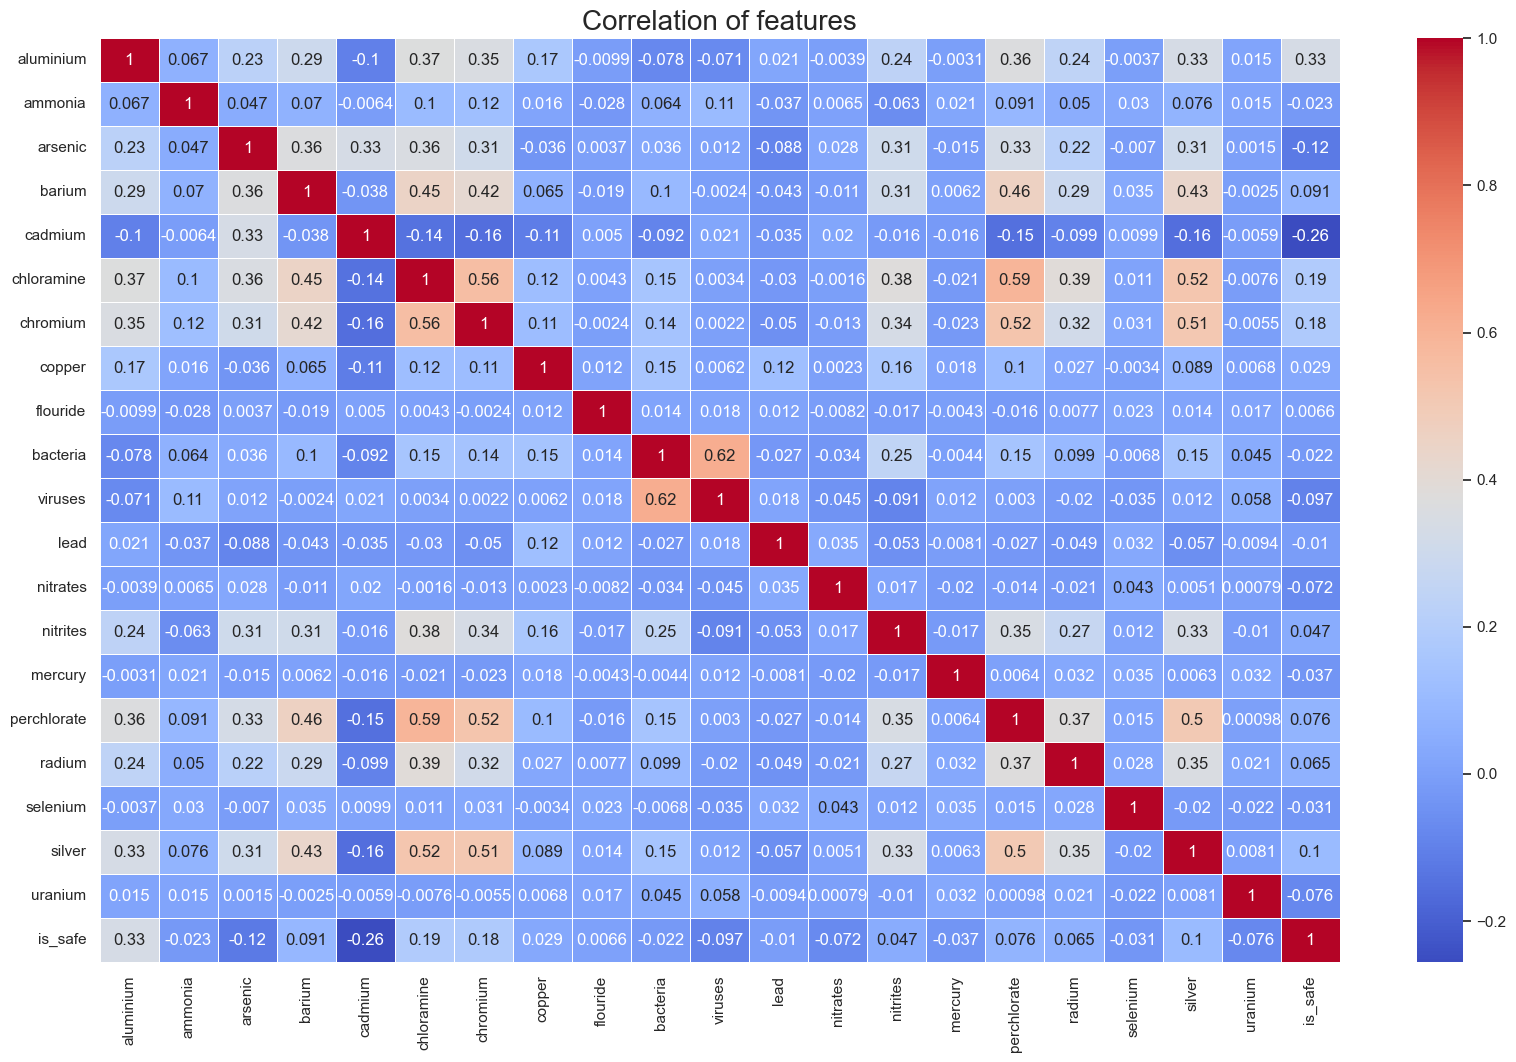

In [54]:
corr_matrix = df.corr()
plt.figure(figsize = (20, 12))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation of features', fontsize = 20)
plt.show()

Основное на что надо смотреть - последний столбец матрицы

Мы видим что никакой признак по отдельности не имеет сильную линейную зависимость с таргетной переменной (значение корреляции меньше 0.7 по модулю)

# Подготовка данных для обучения

На этом этапе необходимо привести все признаки к числовым переменным, разделить данные на обучающую и тестовую выборки и произвести масштабирование признаков

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [56]:
X = df.drop('is_safe', axis = 1)
y = df['is_safe']

Данные разделяются на две независимые выборки — для обучения модели и для оценки её качества (тестирования). Это позволяет проверять обобщающую способность модели на данных, которые она не видела в процессе обучения.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Приведение числовых признаков к одному масштабу (например, стандартизация или нормализация), чтобы избежать доминирования признаков с большими значениями.

In [58]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

# Обучение моделей

Теперь можно приступить к обучению моделей

Для сравнения различных моделей я буду использовать следующие метрики
- **Accuracy** (точность): измеряет долю правильных ответов среди всех прогнозов
- **Precision** (точность): показывает долю истинно положительных предсказаний среди всех предсказанных положительных результатов
- **Recall** (полнота): измеряет долю истинно положительных предсказаний среди всех реальных положительных случаев
- **F1-score**: является средним гармоническим precision и recall

Также для некоторых моделей я буду использовать метод автоматизированного подбора оптимальных гиперпараметров с использованием кросс-валидации - **GridSearchCV**

Кросс валидация - метод оценки производительности модели машинного обучения, который позволяет использовать все доступные данные для обучения и оценки модели. Основная идея заключается в разделении данных на несколько частей (фолдов), обучении модели на части данных (train set) и оценке её качества на оставшейся части данных (validation set). Процесс повторяется несколько раз, каждый раз с другим набором данных в качестве validation set, и результаты усредняются для получения более надежной оценки качества модели.

## Логистическая регрессия

Логистическая регрессия основана на логистической функции (сигмоиде), которая преобразует взвешенную сумму входных признаков в вероятность принадлежности к положительному классу. Формула логистической функции: $$\sigma(z) = \frac{1}{1+e^{-z}}$$
где $z = \beta_0 + \beta_1 x_1+ \beta_2 x_2 + \dots +\beta_n x_n$ - линейная комбинация входных признаков с их весами (коэффициентами).

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score

model_results = {}

In [60]:
model = LogisticRegression(max_iter = 5000, random_state = 42, solver = 'liblinear')

parameters = [{'penalty':['l1','l2'], 
              'C':[0.1, 1, 10, 100, 1000, 10000]}]

grid_search = GridSearchCV(estimator = model,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)
grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=5000, random_state=42,
                                          solver='liblinear'),
             param_grid=[{'C': [0.1, 1, 10, 100, 1000, 10000],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [61]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['logregr'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.9025
F1 Score: 0.4583333333333333
Precision: 0.75
Recall: 0.33


Для каждой модели построю матрицу ошибок - инструмент визуализации, который позволяет сравнивать фактические и предсказанные классы для тестового набора.

Матрица разделяет результаты на четыре основных категории: True Positive (истинно положительные), True Negative (истинно отрицательные), False Positive (ложно положительные) и False Negative (ложно отрицательные). Это помогает понять, где именно модель ошибается — совершает ли она частые ложные срабатывания, пропуски нужных случаев или делает правильные предсказания.

Text(0.5, 1.0, 'Confusion Matrix')

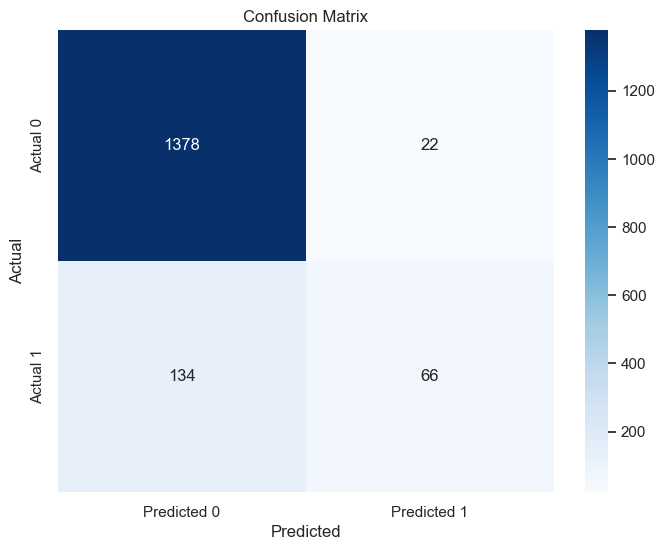

In [67]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## K-ближайших соседей

Метод k-ближайших соседей (K-Nearest Neighbors, KNN) — это простой и интуитивно понятный алгоритм машинного обучения, который используется как для задач классификации, так и для задач регрессии.

Алгоритм основан на предположении, что объекты одного класса находятся в пространстве признаков близко друг к другу. То есть, если у объекта есть близкие по значению признаки, то он скорее всего принадлежит к тому же классу, что и его ближайшие соседи.

Основные гиперпараметры модели:
- **k** - количество ближайших соседей, которые используются для принятия решения о классификации
- **Метрика расстояния** - функция, используемая для измерения расстояния между объектами в пространстве признаков

In [68]:
from sklearn.neighbors import KNeighborsClassifier

In [118]:
model = KNeighborsClassifier()

param_grid = {'n_neighbors':np.arange(1,40), 'metric':['euclidean', 'manhattan', 'minkowski']}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', refit = 'accuracy')

grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             refit='accuracy', scoring='accuracy')

In [119]:
grid_search.best_params_

{'metric': 'euclidean', 'n_neighbors': 23}

In [120]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['knn'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.900625
F1 Score: 0.38132295719844356
Precision: 0.8596491228070176
Recall: 0.245


Text(0.5, 1.0, 'Confusion Matrix')

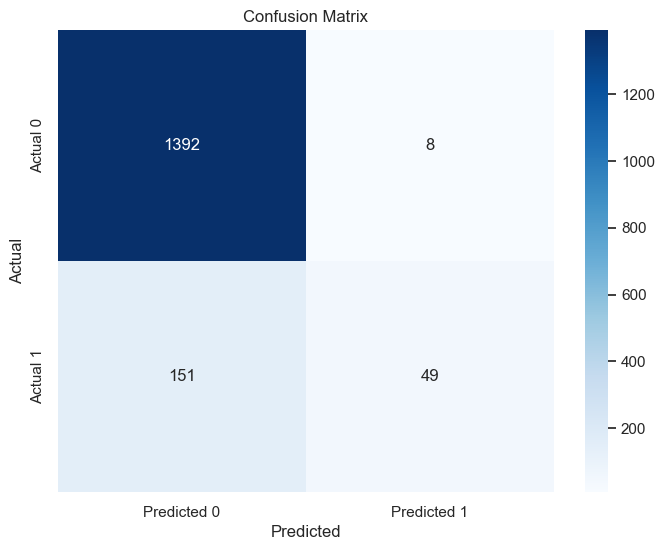

In [121]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Наивный Байес

Метод наивного Байеса (Naive Bayes) — это простой вероятностный классификатор, основанный на применении теоремы Байеса с наивным предположением о независимости признаков

**Теорема Байеса**: Основная идея метода заключается в применении теоремы Байеса для оценки вероятности принадлежности объекта к определённому классу, основываясь на его признаках:
$$P(C_k|x_1,\dots ,x_n) = \frac{P(C_k)\cdot P(x_1,\dots ,x_n|C_k)}{P(x_1, \dots, x_n)}$$ здесь $C_k$ - класс, $x_1,\dots ,x_n$ - признаки объекта

**Наивное предположение**: Метод предполагает, что все признаки объекта являются независимыми между собой при условии известного класса. 

In [74]:
from sklearn.naive_bayes import GaussianNB

In [115]:
model = GaussianNB()
model.fit(X_train_std, y_train)

GaussianNB()

In [116]:
y_pred = model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['bayes'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.844375
F1 Score: 0.49696969696969695
Precision: 0.41694915254237286
Recall: 0.615


Text(0.5, 1.0, 'Confusion Matrix')

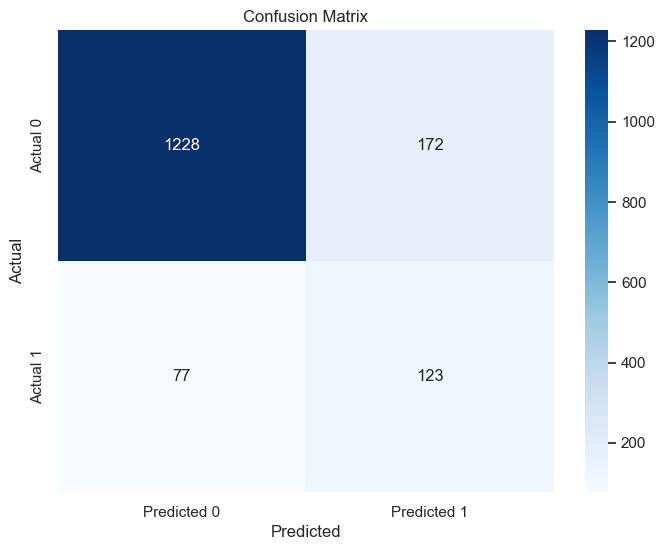

In [117]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Градиентный бустинг

Градиентный бустинг (Gradient Boosting) — это метод машинного обучения, который строит ансамбль слабых предсказательных моделей (обычно деревьев решений) последовательно, таким образом, что каждая новая модель исправляет ошибки предыдущей.

- **Начальная модель** (обычно простая, например, константное предсказание): Строится первая базовая модель, которая пытается приблизить целевую переменную.
- **Последующие модели**: Каждая последующая модель строится таким образом, чтобы минимизировать остатки (разницу между предсказанием ансамбля и реальными значениями).

In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [109]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)

model.fit(X_train_std, y_train)

GradientBoostingClassifier()

In [110]:
y_pred = model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['gradboost'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.95875
F1 Score: 0.8135593220338984
Precision: 0.935064935064935
Recall: 0.72


Text(0.5, 1.0, 'Confusion Matrix')

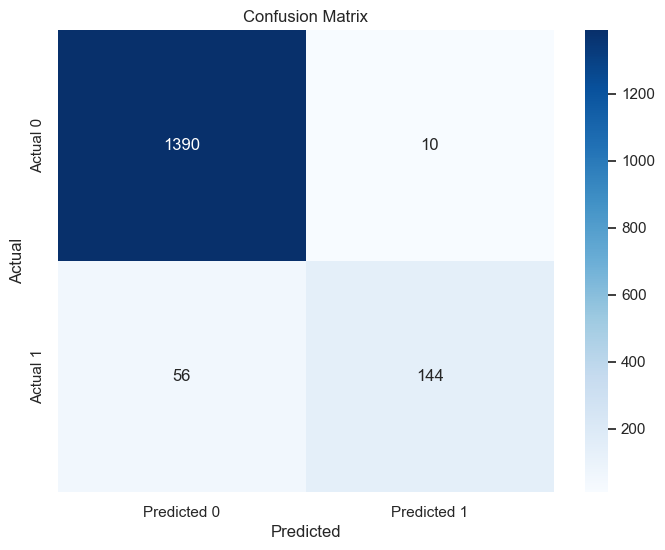

In [111]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Деревья Решений

Дерево решений — это мощный метод машинного обучения, используемый для решения задач как классификации, так и регрессии. Основная идея заключается в создании структуры дерева, где каждый узел представляет собой решающее правило на основе признаков данных.

Структура дерева:
- **Корень дерева**: Начальный узел, который содержит все данные.
- **Внутренние узлы**: Узлы, которые содержат решающие правила на основе значений признаков. Например, "если признак X <= значение Y, то перейти к левой ветви, иначе к правой".
- **Листовые узлы**: Конечные узлы дерева, которые содержат предсказание (для задачи классификации это может быть класс, для регрессии — числовое значение).

Построение дерева:
- **Рекурсивное разбиение**: Дерево строится рекурсивно путем разбиения данных на подмножества на основе значений признаков.
- **Критерии разбиения**: Выбор признака и значения, по которым происходит разбиение, осуществляется на основе оптимального критерия (например, наименьшей неопределенности или максимального прироста информации).

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [112]:
model = DecisionTreeClassifier()

model.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [113]:
y_pred = model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['tree'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.954375
F1 Score: 0.8132992327365729
Precision: 0.8324607329842932
Recall: 0.795


Text(0.5, 1.0, 'Confusion Matrix')

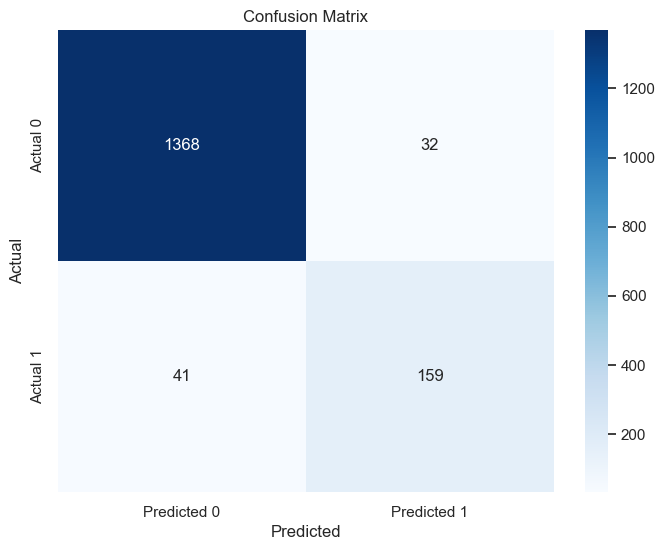

In [114]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Случайный лес

Случайный лес (Random Forest) — это ансамблевый метод машинного обучения, который строит несколько деревьев решений в процессе обучения и комбинирует их для повышения качества предсказаний и уменьшения переобучения.

**Строительство ансамбля деревьев**:
- Случайный лес состоит из множества деревьев решений, которые строятся независимо друг от друга.
- Каждое дерево строится на основе случайной подвыборки данных (bootstrap sample) и случайного подмножества признаков (feature bagging). Это помогает снизить корреляцию между деревьями и уменьшить переобучение.

**Процесс построения деревьев**:
- Для каждого дерева выбирается случайная подвыборка данных (с повторениями, благодаря чему некоторые данные могут попасть в выборку несколько раз).
- Для каждого узла дерева случайным образом выбирается подмножество признаков.
- Дерево строится до тех пор, пока не будет выполнен критерий останова (например, достигнута максимальная глубина или нельзя дальше улучшать меру неопределенности).

**Комбинация предсказаний:**
- Предсказания всех деревьев усредняются (для регрессии) или используется голосование большинства (для классификации), чтобы получить окончательный результат.

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
model = RandomForestClassifier()

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_std, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [88]:
grid_search.best_score_

0.9671673426505084

In [89]:
grid_search.best_params_

{'max_depth': 20,
 'max_features': None,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 50}

In [92]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['randfor'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.97
F1 Score: 0.8681318681318682
Precision: 0.9634146341463414
Recall: 0.79


Text(0.5, 1.0, 'Confusion Matrix')

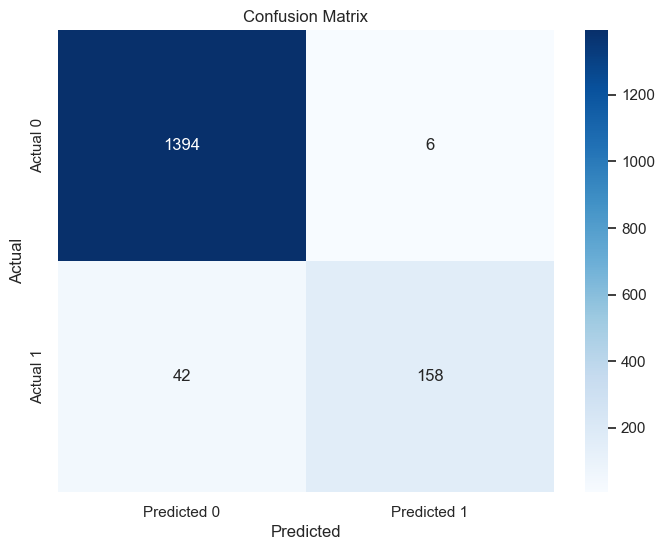

In [91]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

## Стекинг

**StackingClassifier** - это ансамблевый метод машинного обучения, который комбинирует несколько базовых классификаторов с целью повышения качества предсказаний. Он основывается на идее использования предсказаний базовых моделей как входных данных для мета-модели (модели второго уровня), которая делает окончательное предсказание.

Стеккинг использует несколько различных базовых классификаторов (например, случайный лес, метод ближайших соседей, логистическая регрессия и т.д.), каждый из которых обучается на исходных данных.

In [94]:
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier

In [99]:
base_learners = [
    ('rf', RandomForestClassifier(max_depth= 20, max_features = None, min_samples_leaf = 2, min_samples_split = 5, n_estimators= 50)),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))
]

meta_model = LogisticRegression()

stacking = StackingClassifier(estimators=base_learners, final_estimator=meta_model, cv=5)

stacking.fit(X_train_std, y_train)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=20,
                                                       max_features=None,
                                                       min_samples_leaf=2,
                                                       min_samples_split=5,
                                                       n_estimators=50)),
                               ('dt', DecisionTreeClassifier()),
                               ('svc', SVC(probability=True))],
                   final_estimator=LogisticRegression())

In [100]:
y_pred = stacking.predict(X_test_std)

# Вычисляем и выводим метрики для модели с лучшими параметрами
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
model_results['stacking'] = [accuracy, f1, precision, recall]

print(f"Accuracy: {accuracy}")
print(f"F1 Score: {f1}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Accuracy: 0.97125
F1 Score: 0.875
Precision: 0.9583333333333334
Recall: 0.805


Text(0.5, 1.0, 'Confusion Matrix')

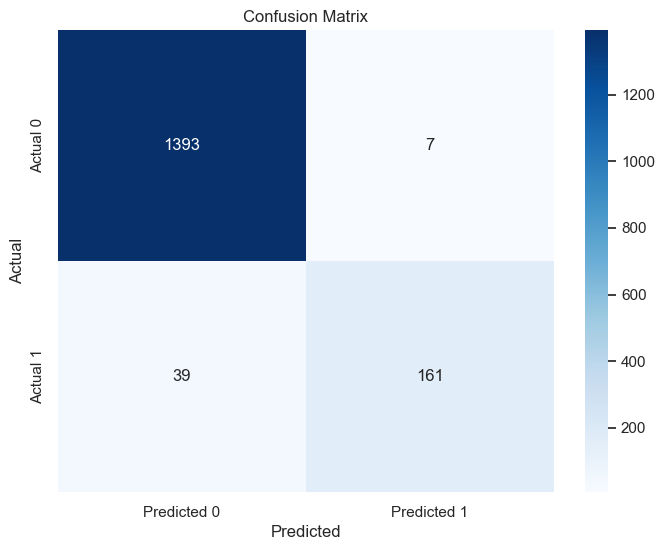

In [101]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Predicted 0', 'Predicted 1'], 
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Выводы

Мы обучили и протестировали несколько моделей машинного обучения на наших данных, давайте сравним основные метрики качества моделей и выберем наиболее эффективные модели

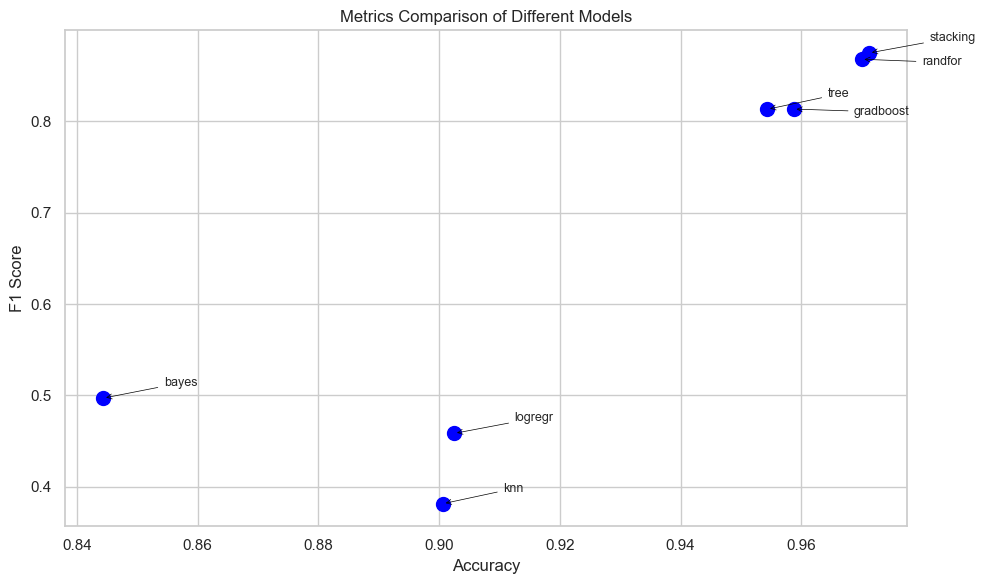

In [144]:
metrics = model_results

models = list(metrics.keys())
accuracy = [metrics[model][0] for model in models]
f1 = [metrics[model][1] for model in models]

plt.figure(figsize=(10, 6))
plt.scatter(accuracy, f1, color='blue', marker='o', s=100)

for i, model in enumerate(models):
    if model == 'randfor' or model == 'gradboost':
        plt.annotate(model, (accuracy[i], f1[i]), xytext=(accuracy[i] + 0.01, f1[i] - 0.01),
                 fontsize=9, ha='left', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='black', lw=0.5))
    else:
        plt.annotate(model, (accuracy[i], f1[i]), xytext=(accuracy[i] + 0.01, f1[i] + 0.01),
                 fontsize=9, ha='left', va='bottom',
                 arrowprops=dict(arrowstyle='->', color='black', lw=0.5))


plt.xlabel('Accuracy')
plt.ylabel('F1 Score')
plt.title('Metrics Comparison of Different Models')
plt.grid(True)
plt.tight_layout()

Модели **Random Forest** и **Stacking Classifier** показали самые наилучшие результаты на тестируемых данных, точность 97% и F1-score 0.87, что делает их наиболее эффективными и подходящими для нашей задачи классификации.

Для конечного выбора между этими моделями можно обратиться к их матрицам ошибок, а именно к значениям **False Positive (FP)**. Это количество неправильно предсказанных положительных классов, то есть случаи, когда модель ошибочно предсказала, что объект принадлежит к положительному классу, хотя он на самом деле принадлежит к отрицательному классу. 

Для нас критически важно минимизировать ложноположительные результаты, когда модель ошибочно классифицирует воду как пригодную для питья, хотя фактически она не соответствует стандартам питьевой воды. Такая ошибка имеет вес намного больший, чем ошибка классификации пригодной для питья воды как непригодной. Поэтому наилучшим выбором будет модель - **Random Forest**, которая имеет наименьшее количество таких ошибок.